# Here in this dataset i have predicted the layer numbers that could exist on a martian craters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/mars-crater-study-dataset/Mars Crater info.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384343 entries, 0 to 384342
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CRATER_ID               384343 non-null  object 
 1   CRATER_NAME             384343 non-null  object 
 2   LATITUDE_CIRCLE_IMAGE   384343 non-null  float64
 3   LONGITUDE_CIRCLE_IMAGE  384343 non-null  float64
 4   DIAM_CIRCLE_IMAGE       384343 non-null  float64
 5   DEPTH_RIMFLOOR_TOPOG    384343 non-null  float64
 6   MORPHOLOGY_EJECTA_1     384343 non-null  object 
 7   MORPHOLOGY_EJECTA_2     384343 non-null  object 
 8   MORPHOLOGY_EJECTA_3     384343 non-null  object 
 9   NUMBER_LAYERS           384343 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 29.3+ MB


In [4]:
data.head(5)

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


In [5]:
data.columns

Index(['CRATER_ID', 'CRATER_NAME', 'LATITUDE_CIRCLE_IMAGE',
       'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG',
       'MORPHOLOGY_EJECTA_1', 'MORPHOLOGY_EJECTA_2', 'MORPHOLOGY_EJECTA_3',
       'NUMBER_LAYERS'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le_CRATER_NAME = LabelEncoder()
le_MORPHOLOGY_EJECTA_1 = LabelEncoder()
le_MORPHOLOGY_EJECTA_2 = LabelEncoder()
le_MORPHOLOGY_EJECTA_3 = LabelEncoder()

In [7]:
data['CRATER_NAME_n'] = le_CRATER_NAME.fit_transform(data['CRATER_NAME'])
data['MORPHOLOGY_EJECTA_1_n'] = le_MORPHOLOGY_EJECTA_1.fit_transform(data['MORPHOLOGY_EJECTA_1'])
data['MORPHOLOGY_EJECTA_2_n'] = le_MORPHOLOGY_EJECTA_2.fit_transform(data['MORPHOLOGY_EJECTA_2'])
data['MORPHOLOGY_EJECTA_3_n'] = le_MORPHOLOGY_EJECTA_2.fit_transform(data['MORPHOLOGY_EJECTA_3'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384343 entries, 0 to 384342
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CRATER_ID               384343 non-null  object 
 1   CRATER_NAME             384343 non-null  object 
 2   LATITUDE_CIRCLE_IMAGE   384343 non-null  float64
 3   LONGITUDE_CIRCLE_IMAGE  384343 non-null  float64
 4   DIAM_CIRCLE_IMAGE       384343 non-null  float64
 5   DEPTH_RIMFLOOR_TOPOG    384343 non-null  float64
 6   MORPHOLOGY_EJECTA_1     384343 non-null  object 
 7   MORPHOLOGY_EJECTA_2     384343 non-null  object 
 8   MORPHOLOGY_EJECTA_3     384343 non-null  object 
 9   NUMBER_LAYERS           384343 non-null  int64  
 10  CRATER_NAME_n           384343 non-null  int64  
 11  MORPHOLOGY_EJECTA_1_n   384343 non-null  int64  
 12  MORPHOLOGY_EJECTA_2_n   384343 non-null  int64  
 13  MORPHOLOGY_EJECTA_3_n   384343 non-null  int64  
dtypes: float64(4), int64

In [9]:
data.drop(data.columns[[0,1,6,7,8]],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384343 entries, 0 to 384342
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LATITUDE_CIRCLE_IMAGE   384343 non-null  float64
 1   LONGITUDE_CIRCLE_IMAGE  384343 non-null  float64
 2   DIAM_CIRCLE_IMAGE       384343 non-null  float64
 3   DEPTH_RIMFLOOR_TOPOG    384343 non-null  float64
 4   NUMBER_LAYERS           384343 non-null  int64  
 5   CRATER_NAME_n           384343 non-null  int64  
 6   MORPHOLOGY_EJECTA_1_n   384343 non-null  int64  
 7   MORPHOLOGY_EJECTA_2_n   384343 non-null  int64  
 8   MORPHOLOGY_EJECTA_3_n   384343 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 26.4 MB


In [11]:
y = data['NUMBER_LAYERS']

In [12]:
x = data.drop('NUMBER_LAYERS',axis=1)

In [13]:
y

0         0
1         3
2         0
3         0
4         0
         ..
384338    0
384339    0
384340    0
384341    0
384342    0
Name: NUMBER_LAYERS, Length: 384343, dtype: int64

In [14]:
x

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,CRATER_NAME_n,MORPHOLOGY_EJECTA_1_n,MORPHOLOGY_EJECTA_2_n,MORPHOLOGY_EJECTA_3_n
0,84.367,108.746,82.10,0.22,0,0,0,0
1,72.760,164.464,82.02,1.97,452,118,28,0
2,69.244,-27.240,79.63,0.09,0,0,0,0
3,70.107,160.575,74.81,0.13,0,0,0,0
4,77.996,95.617,73.53,0.11,0,0,0,0
...,...,...,...,...,...,...,...,...
384338,-67.138,166.562,1.00,0.00,0,0,0,0
384339,-73.986,39.069,1.00,0.00,0,0,0,0
384340,-76.934,5.923,1.00,0.00,0,0,0,0
384341,-79.415,63.528,1.00,0.00,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn import tree
l_model = tree.DecisionTreeClassifier()

In [17]:
l_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
l_model.score(x_test,y_test)

0.9989679366538599

In [19]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier()
r_model.fit(x_train,y_train)
r_model.score(x_test,y_test)

0.9994015767152633

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.9981353477359652

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[109407,      2,      1,      1,      0,      0],
       [     5,   4677,     10,      5,      0,      0],
       [    58,     24,    872,      4,      1,      0],
       [    14,     28,     41,    132,      1,      0],
       [     2,      2,      1,     14,      0,      0],
       [     0,      0,      0,      1,      0,      0]])

Text(42.0, 0.5, 'Truth')

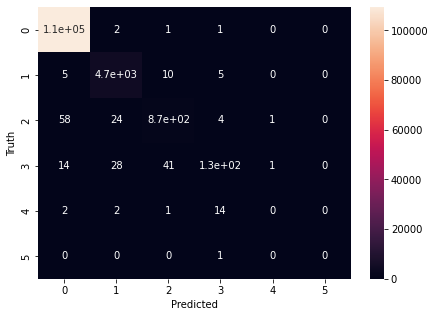

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
pip install git+https://github.com/pycaret/pycaret.git

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-req-build-4qfqcmkh
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-4qfqcmkh
  Resolved https://github.com/pycaret/pycaret.git to commit f93e7087a671458a20bed6dd3a8bcca891034cfc
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━

In [24]:
from pycaret.regression import setup, compare_models, predict_model
pycaret_automl = setup(data=data, target = 'NUMBER_LAYERS', session_id=667)

,Description,Value
0,Session id,667
1,Target,NUMBER_LAYERS
2,Target type,Regression
3,Data shape,"(384343, 9)"
4,Train data shape,"(269040, 9)"
5,Test data shape,"(115303, 9)"
6,Numeric features,8
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [25]:
pycaret_models = compare_models(sort='MSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0009,0.0005,0.0227,0.9944,0.0074,0.0099,3.4110
gbr,Gradient Boosting Regressor,0.0010,0.0005,0.0225,0.9945,0.0077,0.0092,12.2250
rf,Random Forest Regressor,0.0010,0.0006,0.0245,0.9934,0.0089,0.0095,12.6830
dt,Decision Tree Regressor,0.0009,0.0010,0.0320,0.9889,0.0110,0.0095,0.2860
knn,K Neighbors Regressor,0.0036,0.0045,0.0671,0.9511,0.0304,0.0305,2.3330
ada,AdaBoost Regressor,0.0284,0.0110,0.1027,0.8813,0.0547,0.3267,5.5160
lr,Linear Regression,0.0524,0.0329,0.1814,0.6446,0.0903,0.4231,0.7920
ridge,Ridge Regression,0.0524,0.0329,0.1814,0.6446,0.0903,0.4231,0.0980
lar,Least Angle Regression,0.0524,0.0329,0.1814,0.6446,0.0903,0.4231,0.0980
br,Bayesian Ridge,0.0524,0.0329,0.1814,0.6446,0.0903,0.4231,0.1470


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [26]:
print(pycaret_models)

ExtraTreesRegressor(n_jobs=-1, random_state=667)


In [27]:
from sklearn.ensemble import ExtraTreesRegressor
model_ex = ExtraTreesRegressor(n_jobs=-1, random_state=667)
model_ex.fit(x_train,y_train)
model_ex.score(x_test,y_test)

0.9941859629566736

<AxesSubplot:>

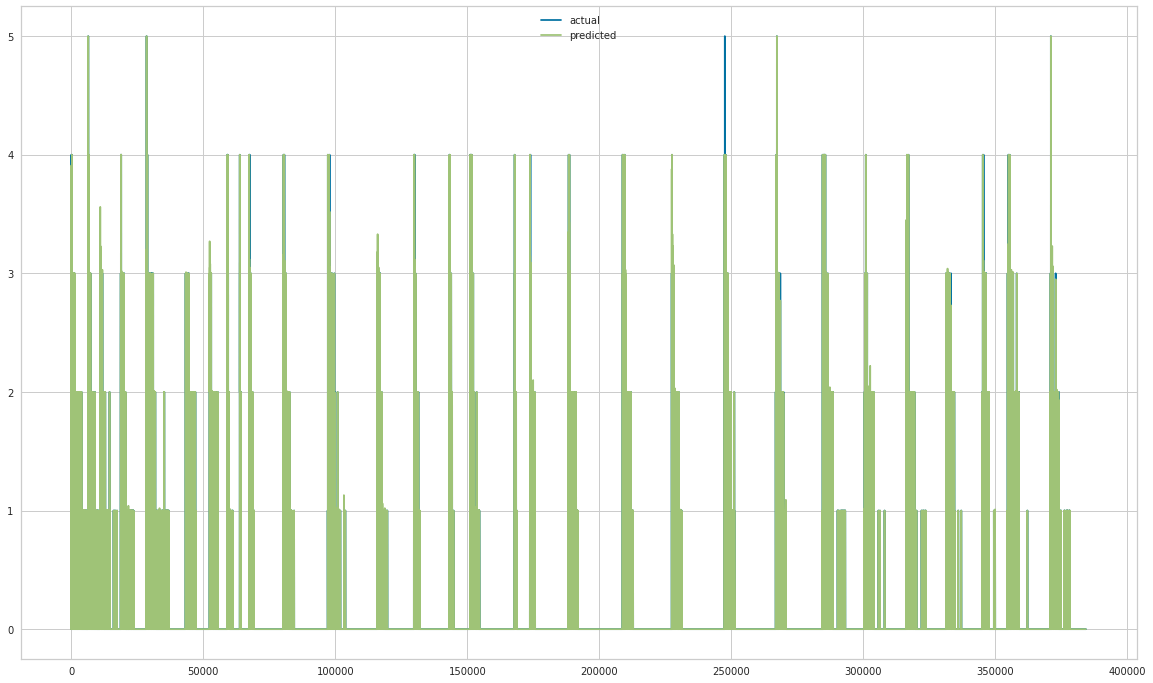

In [28]:
y_pred = model_ex.predict(x)
ex = pd.DataFrame(data={'actual': data['NUMBER_LAYERS'], 'predicted': y_pred})
ex.plot(figsize=(20, 12))